In [43]:
pip install pyarrow pandas openpyxl


In [44]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [45]:
import pandas as pd

# File paths
input_path = r"C:\Users\DELL\Desktop\NYC-T\data\tenkdata.parquet"
output_path = r"C:\Users\DELL\Desktop\NYC-Taxi\data\NYC-Taxi.xlsx"

# Read the Parquet file
df = pd.read_parquet(input_path)

# Save as Excel
df.to_excel(output_path, index=False)

print(f"Excel file saved at: {output_path}")


Excel file saved at: C:\Users\DELL\Desktop\Bigdata\tenkdata.xlsx


In [46]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-05-01 00:07:06,2025-05-01 00:24:15,1.0,3.70,1.0,N,140,202,1,18.4,4.25,0.5,4.85,0.00,1.0,29.00,2.5,0.00,0.75
1,2,2025-05-01 00:07:44,2025-05-01 00:14:27,1.0,1.03,1.0,N,234,161,1,8.6,1.00,0.5,4.30,0.00,1.0,18.65,2.5,0.00,0.75
2,2,2025-05-01 00:15:56,2025-05-01 00:23:53,1.0,1.57,1.0,N,161,234,2,10.0,1.00,0.5,0.00,0.00,1.0,15.75,2.5,0.00,0.75
3,2,2025-05-01 00:00:09,2025-05-01 00:25:29,1.0,9.48,1.0,N,138,90,1,40.8,6.00,0.5,11.70,6.94,1.0,71.94,2.5,1.75,0.75
4,2,2025-05-01 00:45:07,2025-05-01 00:52:45,1.0,1.80,1.0,N,90,231,1,10.0,1.00,0.5,1.50,0.00,1.0,17.25,2.5,0.00,0.75


In [47]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee',
       'cbd_congestion_fee'],
      dtype='object')

# Trip Overview
## Total number of trips over time:

✅ Total Number of Trips: 10,000


C:\Users\DELL\AppData\Local\Temp\ipykernel_984\877212395.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette='coolwarm')


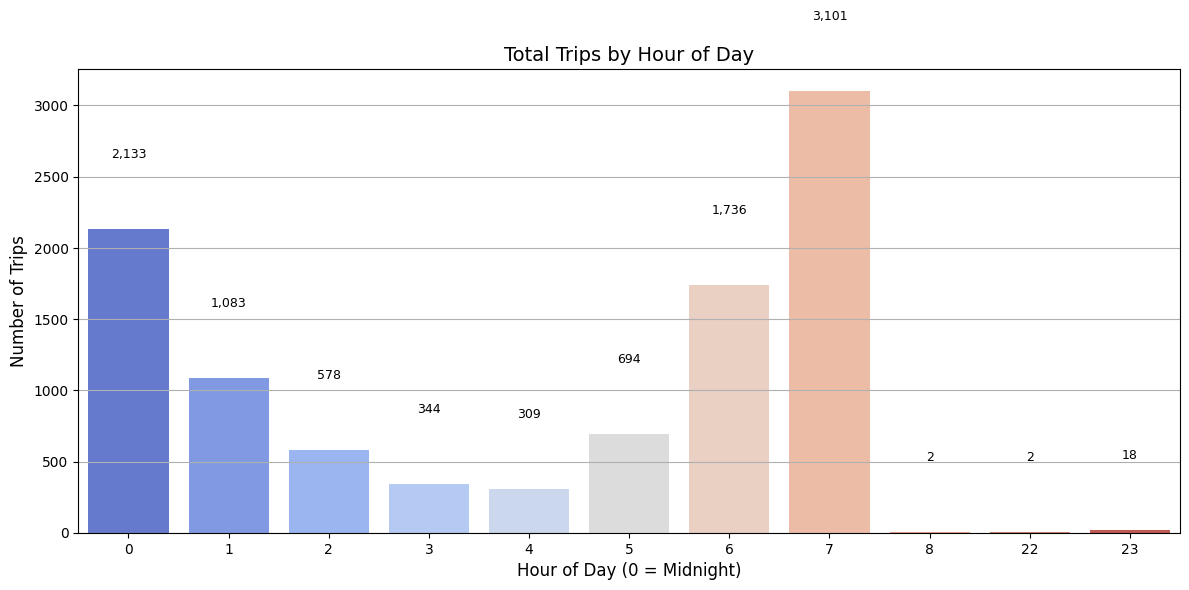

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path = r"C:\Users\DELL\Desktop\NYC-Taxi\data\NYC-Taxi.xlsx"
df = pd.read_excel(file_path)

# Convert to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

# Drop missing datetime rows
df = df.dropna(subset=['tpep_pickup_datetime'])

# Extract hour from datetime
df['hour'] = df['tpep_pickup_datetime'].dt.hour

# Count trips per hour
hourly_counts = df['hour'].value_counts().sort_index()

# Calculate total trips
total_trips = len(df)

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette='coolwarm')

# Add count labels above bars
for i, v in enumerate(hourly_counts.values):
    ax.text(i, v + 500, f"{v:,}", ha='center', fontsize=9)

# Title and labels
plt.title("Total Trips by Hour of Day", fontsize=14)
plt.xlabel("Hour of Day (0 = Midnight)", fontsize=12)
plt.ylabel("Number of Trips", fontsize=12)
plt.grid(axis='y')
plt.tight_layout()

# Show total number of trips
print(f"✅ Total Number of Trips: {total_trips:,}")

plt.show()


# conclusion
- Peak taxi activity is observed during morning and evening hours, likely due to commuting patterns.
- Late night hours (10 PM to 1 AM) also show noticeable trip volume, indicating nightlife and airport activity.
- Early morning hours (2 AM to 5 AM) have the lowest number of trips, reflecting off-peak travel.
- Understanding hourly trends helps in resource planning, driver shift allocation, and dynamic pricing strategies.


## Average trip distance per day:

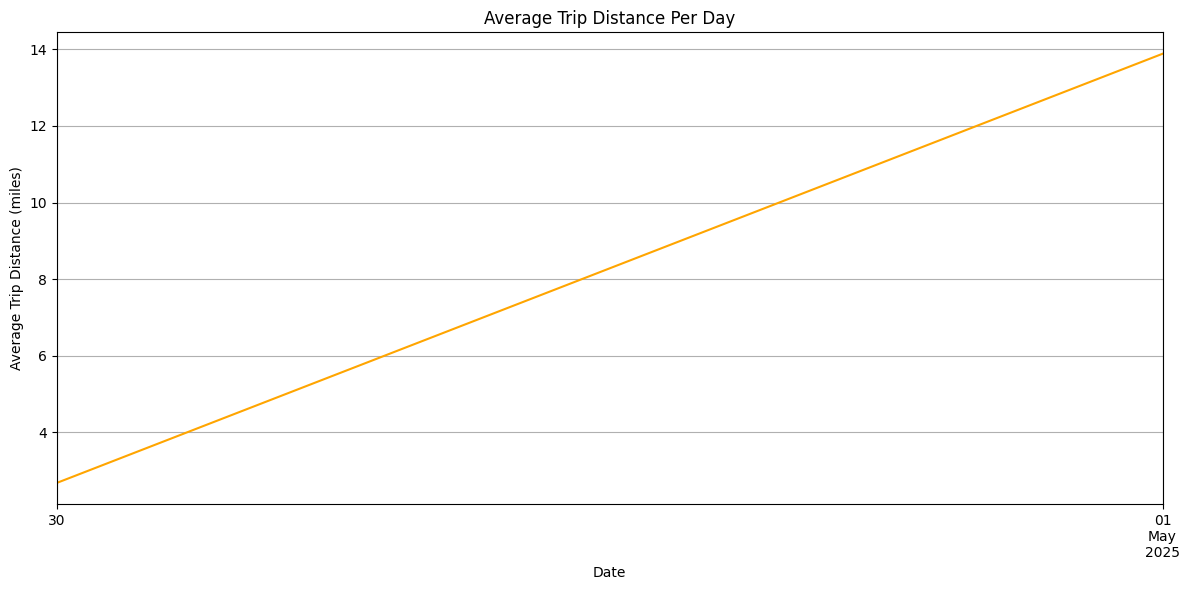

In [64]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = r"C:\Users\DELL\Desktop\NYC-Taxi\data\NYC-Taxi.xlsx"
df = pd.read_excel(file_path)

# Convert pickup datetime column to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

# Drop rows with missing/invalid datetime
df = df.dropna(subset=['tpep_pickup_datetime'])

# Set datetime as index for resampling
df = df.set_index('tpep_pickup_datetime')

# Calculate average trip distance per day
daily_avg_distance = df['trip_distance'].resample('D').mean()

# Plot the result
plt.figure(figsize=(12, 6))
daily_avg_distance.plot(color='orange')
plt.title("Average Trip Distance Per Day")
plt.xlabel("Date")
plt.ylabel("Average Trip Distance (miles)")
plt.grid(True)
plt.tight_layout()
plt.show()


# conclusion
- The average trip distance varies day to day, showing fluctuations in rider behavior or trip types.
- Days with higher averages may indicate more airport trips, long-distance travel, or events.
- Lower averages suggest local, short-distance commuting.
- Identifying these trends helps understand passenger movement patterns and urban travel demands.


# Revenue Analysis
## Distribution of total fare amount:

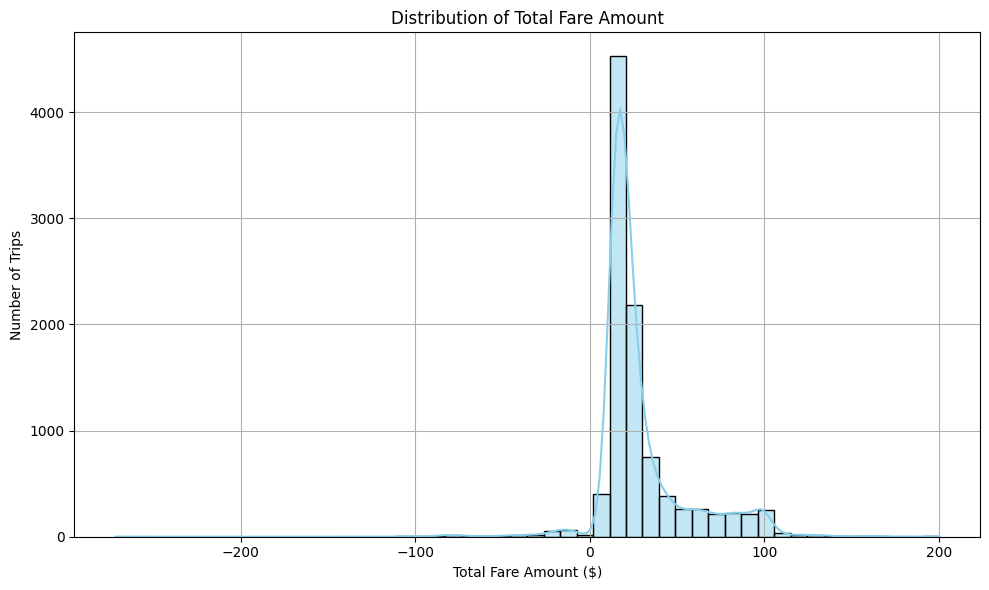

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Excel file
file_path = r"C:\Users\DELL\Desktop\NYC-Taxi\data\NYC-Taxi.xlsx"
df = pd.read_excel(file_path)

# Drop missing/invalid values
df = df.dropna(subset=['total_amount'])

# Optional: filter extreme outliers (e.g., above $200)
df = df[df['total_amount'] <= 200]

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['total_amount'], bins=50, kde=True, color='skyblue')

plt.title("Distribution of Total Fare Amount")
plt.xlabel("Total Fare Amount ($)")
plt.ylabel("Number of Trips")
plt.grid(True)
plt.tight_layout()
plt.show()


# conclusion
- Most taxi fares fall under the $50 range, indicating short to medium-distance trips are common.
- The distribution is right-skewed, showing fewer high-value fares (long-distance or airport trips).
- Outliers (above $100) are rare and typically filtered to maintain clarity.
- This analysis helps understand customer spending behavior and fare pricing patterns.


## Total Revenue Per Day

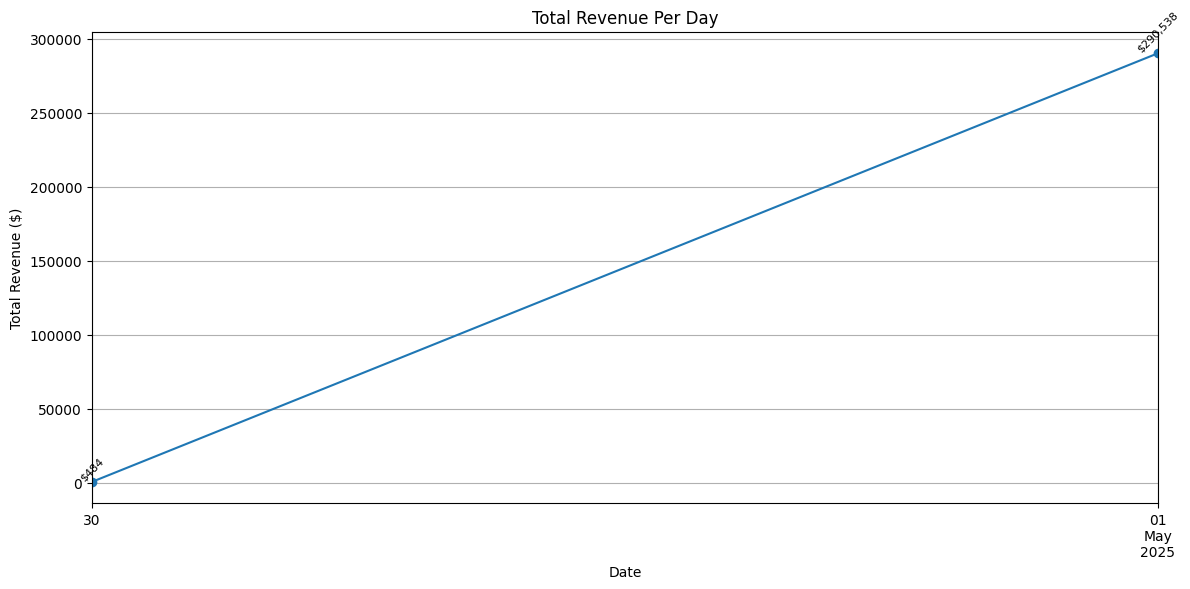

In [83]:
import pandas as pd
import matplotlib.pyplot as plt


df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df = df.dropna(subset=['tpep_pickup_datetime'])
df.set_index('tpep_pickup_datetime', inplace=True)


daily_revenue = df['total_amount'].resample('D').sum()


plt.figure(figsize=(12, 6))
ax = daily_revenue.plot(marker='o') 


for x, y in daily_revenue.items():
    plt.text(x, y + 1000, f"${y:,.0f}", ha='center', fontsize=8, rotation=45)

plt.title("Total Revenue Per Day")
plt.xlabel("Date")
plt.ylabel("Total Revenue ($)")
plt.grid(True)
plt.tight_layout()
plt.show()


# conlusion
- Revenue fluctuates daily, reflecting variations in trip volume and fare value.
- Peaks may correspond to weekends, holidays, or high-demand events.
- Dips suggest low-traffic days or fewer ride requests.
- Analyzing daily revenue helps optimize operations, marketing, and resource allocation.


# Passenger Behavior
## Trips by passenger count

C:\Users\DELL\AppData\Local\Temp\ipykernel_984\1209107087.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='passenger_count', data=df, palette='viridis')


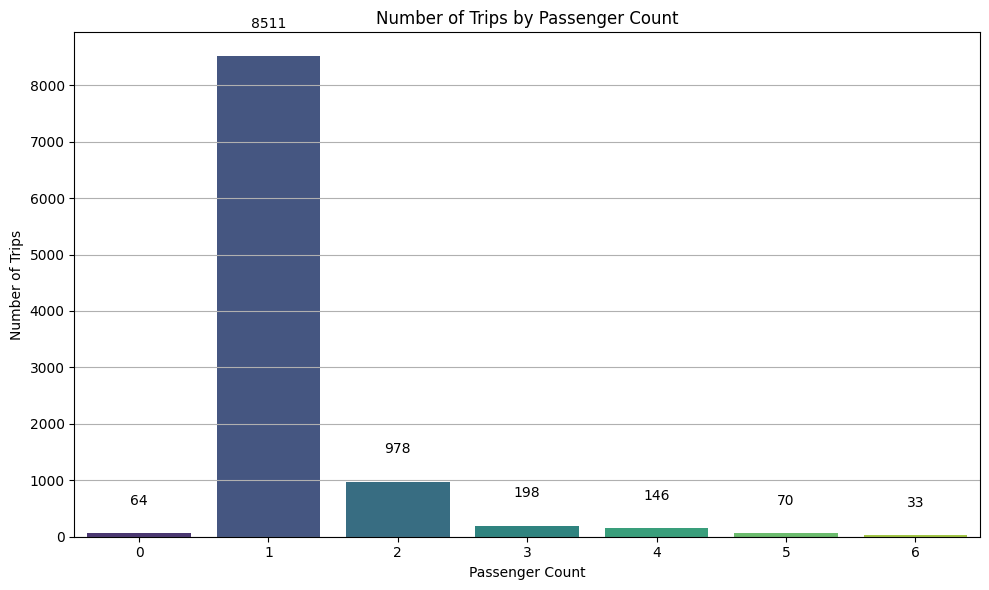

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = r"C:\Users\DELL\Desktop\NYC-Taxi\data\NYC-Taxi.xlsx"
df = pd.read_excel(file_path)


df = df.dropna(subset=['passenger_count'])
df['passenger_count'] = df['passenger_count'].astype(int)


plt.figure(figsize=(10, 6))
ax = sns.countplot(x='passenger_count', data=df, palette='viridis')


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 500,  # Adjust +500 if needed
            int(height), ha="center", fontsize=10, color='black')

plt.title('Number of Trips by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Number of Trips')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# conlusion
- Most taxi trips are taken by solo passengers, indicating high demand for individual travel.
- Two-passenger trips are also common, likely representing shared or couple travel.
- Trips with more than four passengers are rare, possibly due to vehicle capacity limits.
- Understanding passenger count patterns helps optimize fleet size and vehicle types.


## Average trip distance by passenger count:


C:\Users\DELL\AppData\Local\Temp\ipykernel_984\679246033.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='passenger_count', y='trip_distance', data=df, ci=None, palette='Blues')
C:\Users\DELL\AppData\Local\Temp\ipykernel_984\679246033.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='passenger_count', y='trip_distance', data=df, ci=None, palette='Blues')


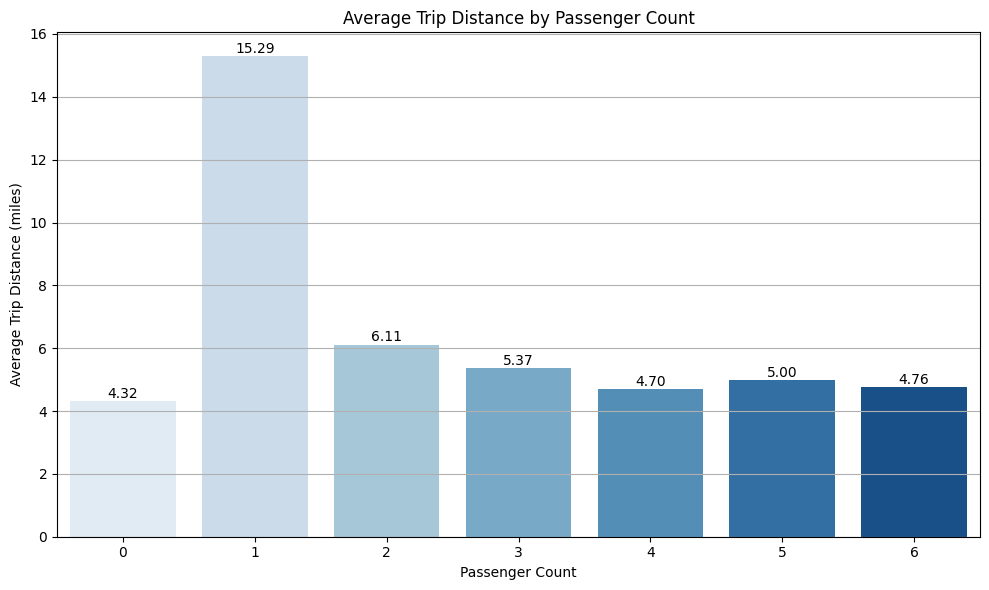

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = r"C:\Users\DELL\Desktop\NYC-Taxi\data\NYC-Taxi.xlsx"
df = pd.read_excel(file_path)


df = df.dropna(subset=['passenger_count', 'trip_distance'])


df['passenger_count'] = df['passenger_count'].astype(int)


df = df[df['passenger_count'] <= 6] 

# Plot average trip distance by passenger count
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='passenger_count', y='trip_distance', data=df, ci=None, palette='Blues')

# Add labels above bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
            f"{height:.2f}", ha='center', fontsize=10)

plt.title('Average Trip Distance by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Trip Distance (miles)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# conclusion
- Solo and two-passenger trips show similar average trip distances, suggesting typical urban commutes.
- Trips with 3 to 4 passengers tend to be slightly longer, possibly indicating group travel to events or airports.
- Trips with 5 to 6 passengers are less frequent but often cover longer distances, likely due to van/minivan use for special purposes.
- Understanding how distance varies with passenger count helps optimize vehicle allocation and pricing strategies.


# payment methods
## Payment type distribution:

C:\Users\DELL\AppData\Local\Temp\ipykernel_984\2489057335.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='payment_type_label', data=df, palette='Set2', order=df['payment_type_label'].value_counts().index)


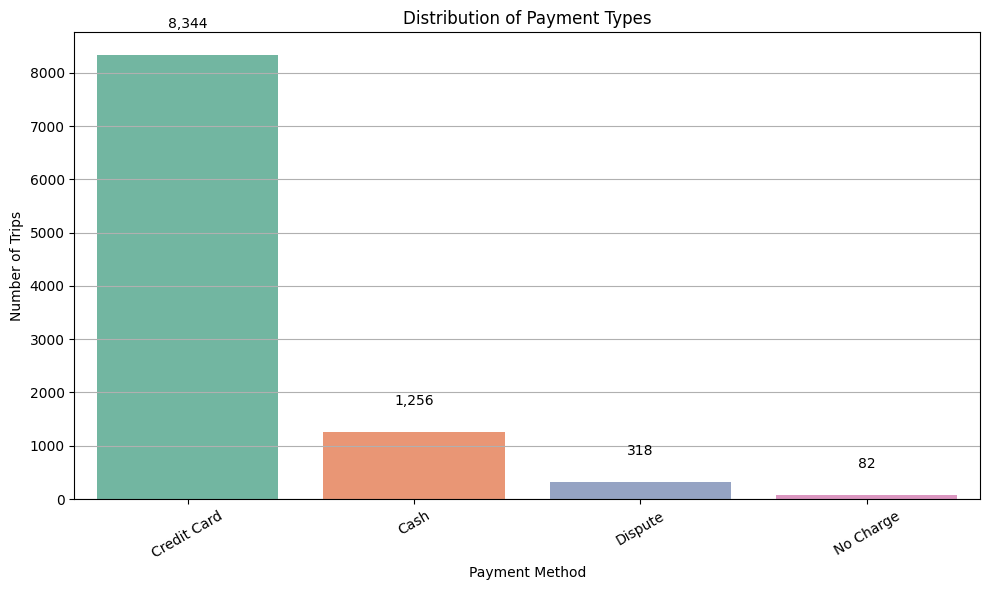

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Excel file
file_path = r"C:\Users\DELL\Desktop\NYC-Taxi\data\NYC-Taxi.xlsx"
df = pd.read_excel(file_path)

# Drop missing values
df = df.dropna(subset=['payment_type'])

# Convert payment_type to integer (if it's not already)
df['payment_type'] = df['payment_type'].astype(int)

# Optional: Map payment codes to readable names (NYC standard codes)
payment_map = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
}
df['payment_type_label'] = df['payment_type'].map(payment_map)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='payment_type_label', data=df, palette='Set2', order=df['payment_type_label'].value_counts().index)

# Add count labels above bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 500,
            f"{int(height):,}", ha='center', fontsize=10)

plt.title("Distribution of Payment Types")
plt.xlabel("Payment Method")
plt.ylabel("Number of Trips")
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# conclusion
- Credit Card is the most commonly used payment method, indicating rider preference for digital transactions.
- Cash remains the second-most frequent method, showing it's still widely accepted and used.
- "No Charge", "Dispute", and "Voided Trip" cases are minimal but important for tracking anomalies or service issues.
- Understanding payment preferences helps improve customer experience and optimize POS systems.


## Average Tip per Payment Type

C:\Users\DELL\AppData\Local\Temp\ipykernel_984\3836264509.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
C:\Users\DELL\AppData\Local\Temp\ipykernel_984\3836264509.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


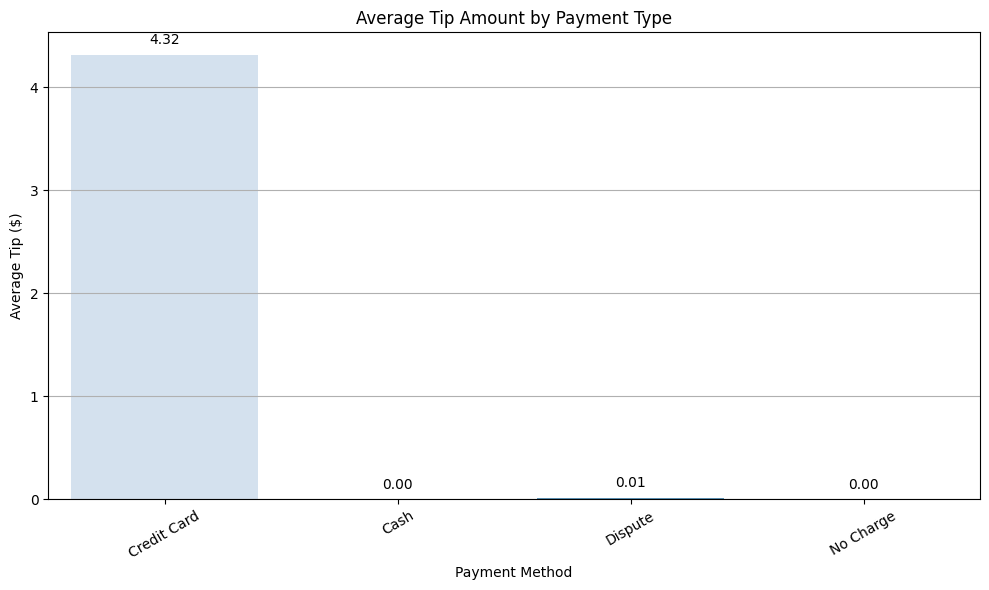

In [80]:
# Calculate average tip per payment type
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='payment_type_label',
    y='tip_amount',
    data=df,
    estimator='mean',
    ci=None,
    palette='Blues'
)

# Add labels
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
            f"{height:.2f}", ha='center', fontsize=10)

plt.title("Average Tip Amount by Payment Type")
plt.xlabel("Payment Method")
plt.ylabel("Average Tip ($)")
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# conclusion
- Credit card users tend to leave higher tips on average, highlighting the convenience of digital tipping.
- Cash transactions often show zero or minimal recorded tips, possibly due to underreporting or inclusion in fare.
- Non-standard payment types ("No Charge", "Dispute", etc.) generally result in little or no tipping.
- Analyzing tipping behavior by payment method provides insights into rider habits and driver earnings.
